<a href="https://colab.research.google.com/github/oguzsozen/Joyo_Kanji_Clustering/blob/main/Joyo_Kanji_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import csv

In [ ]:
pathBase = "/content/drive/MyDrive/Colab Notebooks/datasets/Joyo_Kanji_Clustering/"

In [ ]:
file = open(pathBase + "joyo_kanji.csv", "r", encoding="utf-8")

In [ ]:
csvreader  = csv.reader(file)
next(csvreader)

kanji_list=[]

In [ ]:
for line in csvreader:
    kanji_list.append(line[1])

In [ ]:
print(len(kanji_list))
print(kanji_list)

2136
['亜', '哀', '挨', '愛', '曖', '悪', '握', '圧', '扱', '宛', '嵐', '安', '案', '暗', '以', '衣', '位', '囲', '医', '依', '委', '威', '為', '畏', '胃', '尉', '異', '移', '萎', '偉', '椅', '彙', '意', '違', '維', '慰', '遺', '緯', '域', '育', '一', '壱', '逸', '茨', '芋', '引', '印', '因', '咽', '姻', '員', '院', '淫', '陰', '飲', '隠', '韻', '右', '宇', '羽', '雨', '唄', '鬱', '畝', '浦', '運', '雲', '永', '泳', '英', '映', '栄', '営', '詠', '影', '鋭', '衛', '易', '疫', '益', '液', '駅', '悦', '越', '謁', '閲', '円', '延', '沿', '炎', '怨', '宴', '媛', '援', '園', '煙', '猿', '遠', '鉛', '塩', '演', '縁', '艶', '汚', '王', '凹', '央', '応', '往', '押', '旺', '欧', '殴', '桜', '翁', '奥', '横', '岡', '屋', '億', '憶', '臆', '虞', '乙', '俺', '卸', '音', '恩', '温', '穏', '下', '化', '火', '加', '可', '仮', '何', '花', '佳', '価', '果', '河', '苛', '科', '架', '夏', '家', '荷', '華', '菓', '貨', '渦', '過', '嫁', '暇', '禍', '靴', '寡', '歌', '箇', '稼', '課', '蚊', '牙', '瓦', '我', '画', '芽', '賀', '雅', '餓', '介', '回', '灰', '会', '快', '戒', '改', '怪', '拐', '悔', '海', '界', '皆', '械', '絵', '開', '階', '塊', '楷', '解', '潰', '壊', '懐', '諧', '貝', '外', '劾', '害',

# Dataset Oluşturma

In [ ]:
import requests
from bs4 import BeautifulSoup

In [ ]:
import time

In [ ]:
datasets = {}
temp = {}

In [ ]:
def generateDataset(kanji_list):

  def get_radicals(kanji):
    page = requests.get("https://jisho.org/search/" + kanji + "%20%23kanji")
    soup = BeautifulSoup(page.content, "html.parser")

    a_hrefs = str(soup.find_all("dd")[1])
    a_hrefs = a_hrefs.split("</a>")[:-1]

    rad_list=[]

    for a_href in a_hrefs:
      rad_list.append(a_href[-1])

    return rad_list

  i = 0

  for kanji in kanji_list:
    i=i+1
    temp[kanji] = get_radicals(kanji)
    if i % 100 == 0:
      print(f"Progress is {i}")
      time.sleep(30)

In [ ]:
generateDataset(kanji_list)

Progress is 100
Progress is 200
Progress is 300
Progress is 400
Progress is 500
Progress is 600
Progress is 700
Progress is 800
Progress is 900
Progress is 1000
Progress is 1100
Progress is 1200
Progress is 1300
Progress is 1400
Progress is 1500
Progress is 1600
Progress is 1700
Progress is 1800
Progress is 1900
Progress is 2000
Progress is 2100


In [ ]:
import json

In [ ]:
with open(pathBase + "joyo_kanjis_radicals.json", "w", encoding="utf-8") as json_file:
  json.dump(temp, json_file, ensure_ascii=False)

In [ ]:
with open(pathBase + "joyo_kanjis_radicals.json", "r", encoding="utf-8") as json_file:
    temp = json.load(json_file)

In [ ]:
len(temp)

2136

In [ ]:
temp

{'亜': ['一', '｜', '口'],
 '哀': ['亠', '口', '衣'],
 '挨': ['厶', '扎', '矢', '乞'],
 '愛': ['冖', '夂', '心', '爪'],
 '曖': ['冖', '夂', '心', '日', '爪'],
 '悪': ['一', '｜', '口', '心'],
 '握': ['厶', '土', '尸', '扎', '至'],
 '圧': ['厂', '土'],
 '扱': ['扎', '及'],
 '宛': ['卩', '夕', '宀'],
 '嵐': ['山', '風'],
 '安': ['女', '宀'],
 '案': ['女', '宀', '木'],
 '暗': ['日', '立', '音'],
 '以': ['｜', '丶', '人'],
 '衣': ['亠', '衣'],
 '位': ['化', '立'],
 '囲': ['囗', '井'],
 '医': ['匚', '矢', '乞'],
 '依': ['亠', '化', '衣'],
 '委': ['女', '禾'],
 '威': ['ノ', '厂', '女', '戈'],
 '為': ['ユ', '丶', 'ノ', '并', '勹', '杰'],
 '畏': ['一', '田', '衣'],
 '胃': ['月', '田'],
 '尉': ['二', '寸', '小', '尸', '示'],
 '異': ['一', 'ハ', '井', '田'],
 '移': ['夕', '禾'],
 '萎': ['女', '艾', '禾'],
 '偉': ['化', '口', '韋'],
 '椅': ['一', '亅', '口', '大', '木'],
 '彙': ['冖', 'ヨ', '彑', '木', '田'],
 '意': ['心', '日', '立', '音'],
 '違': ['込', '口', '韋'],
 '維': ['小', '幺', '糸', '隹'],
 '慰': ['二', '寸', '小', '尸', '心', '示'],
 '遺': ['一', '｜', 'ハ', '込', '口', '目', '貝'],
 '緯': ['口', '小', '幺', '糸', '韋'],
 '域': ['口', '土', '戈'],
 '育': ['

In [ ]:
radicals = set()

In [ ]:
for rad_list in temp.values():
  radicals.update(rad_list)

In [ ]:
print(len(radicals))
print(radicals)

241
{'門', '犬', '鼓', '瓜', '戈', '斗', '尸', '辰', '几', '宀', '氏', '鬲', '食', '而', '雨', '十', '火', '豆', '自', 'マ', '彑', '黒', '里', '日', '亀', '｜', '青', '斉', '冂', '皮', '毛', '川', '面', '匕', '乙', '品', '冫', '艮', '汁', '骨', '人', '隹', '虍', '乃', '弓', '舛', '髟', '巨', '水', '舌', '疋', '馬', '父', '彡', '貝', '田', '生', '夕', '込', '勿', '刀', '角', '文', '玄', '西', '肉', '月', '車', '忙', '見', '屮', '豸', '岡', '用', '殳', '个', '臣', '甘', '矛', '歹', '干', '谷', '毋', '广', '首', '女', '隶', '聿', '辛', '囗', '凵', '白', '羊', '儿', '尢', '禹', '杰', '豕', '巾', '木', '立', '入', '卩', '丶', '示', '米', '化', '歯', '鹿', '黄', '老', '世', '矢', '言', '艾', '金', '亠', '亅', '頁', 'ヨ', '乞', '土', '目', '及', '幺', '山', '一', '久', '色', '買', '斤', '糸', '鬯', '高', '癶', '支', '行', '巴', '長', '大', '麦', '彳', '欠', '已', '尚', '屯', '亡', '九', '爿', '止', '虫', '耒', '爪', '寸', '韋', '士', '衣', '小', '竜', '爻', '麻', '子', '五', '竹', '至', '奄', '滴', '赤', '卜', '元', '缶', '疔', '扎', '井', '匚', '阡', '弋', '瓦', '香', '非', '鬼', '耳', '手', '心', '刈', '魚', '夂', '二', '穴', '犯', '血', '尤', '音', 'ノ', '臼', '片', '气', '工', '飛', 

In [ ]:
import numpy as np

In [ ]:
dataset = np.zeros([len(temp),len(radicals)])
dataset.shape

(2136, 241)

In [ ]:
all_radicals = list(radicals)
all_radicals.sort()
type(all_radicals)

list

In [ ]:
print(all_radicals)

['ノ', 'ハ', 'マ', 'ユ', 'ヨ', '一', '世', '个', '丶', '乃', '久', '乙', '九', '乞', '也', '亀', '亅', '二', '五', '井', '亠', '亡', '人', '儿', '元', '免', '入', '冂', '冊', '冖', '冫', '几', '凵', '刀', '刈', '初', '力', '勹', '勿', '匕', '化', '匚', '十', '卜', '卩', '厂', '厶', '又', '及', '口', '品', '囗', '土', '士', '夂', '夕', '大', '奄', '女', '子', '宀', '寸', '小', '尚', '尢', '尤', '尸', '屮', '屯', '山', '岡', '巛', '川', '工', '巨', '已', '巴', '巾', '干', '并', '幺', '广', '廴', '廾', '弋', '弓', '彑', '彡', '彳', '心', '忙', '戈', '戸', '手', '扎', '支', '攵', '文', '斉', '斗', '斤', '方', '日', '月', '木', '杰', '欠', '止', '歯', '歹', '殳', '毋', '母', '比', '毛', '氏', '气', '水', '汁', '滴', '火', '無', '爪', '父', '爻', '爿', '片', '牙', '牛', '犬', '犯', '玄', '王', '瓜', '瓦', '甘', '生', '用', '田', '疋', '疔', '癶', '白', '皮', '皿', '目', '矛', '矢', '石', '示', '礼', '禹', '禾', '穴', '立', '竜', '竹', '米', '糸', '缶', '羊', '羽', '老', '而', '耒', '耳', '聿', '肉', '臣', '自', '至', '臼', '舌', '舛', '舟', '艮', '色', '艾', '虍', '虫', '血', '行', '衣', '西', '見', '角', '言', '谷', '豆', '豕', '豸', '貝', '買', '赤', '走', '足', '身', '車', '辛', '辰',

In [ ]:
def onehotencodeing_kanji_radical():
  i=0

  for radical_list in temp.values():
    for radical in radical_list:
      dataset[i, all_radicals.index(radical)] = 1

    i+=1

In [ ]:
onehotencodeing_kanji_radical()

In [ ]:
dataset[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

#Modeli Eğitme ve Değerlendirme

In [ ]:
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn import metrics

from scipy.spatial.distance import cdist
from scipy.cluster.hierarchy import dendrogram

import matplotlib.pyplot as plt

In [ ]:
knn_groups = 150

In [ ]:
kmeans = KMeans(n_clusters=knn_groups)

In [ ]:
trained_model = kmeans.fit(datasets)

In [ ]:
predicts = trained_model.predict(datasets)

In [ ]:
predicts

array([ 29,  60,  45, ...,   8, 100,  34], dtype=int32)

In [ ]:
kanji_clustered = []
for i in range(knn_groups):
  indexs = np.argwhere(predicts == i)

  kanji_clustered.append([])

  for x in indexs:
    kanji_clustered[i].append(kanji_list[int(x)])

In [ ]:
np.argwhere(predicts == 145)[0]

array([186])

In [ ]:
print(len(kanji_clustered))
for line in kanji_clustered:
  print(line)

150
['煎', '前', '喩', '愉', '諭', '輸', '癒']
['魚', '漁', '鯨', '鮮']
['位', '化', '花', '佳', '価', '靴', '休', '仰', '傑', '件', '健', '侯', '候', '喉', '催', '仕', '似', '借', '儒', '宿', '俊', '侵', '信', '仁', '仙', '他', '代', '低', '俳', '倍', '伯', '伐', '閥', '備', '付', '府', '附', '腐', '伏', '仏', '夜', '例']
['忍', '認', '秘', '泌', '密', '蜜']
['温', '涯', '潟', '滑', '汗', '汽', '泣', '源', '江', '混', '滋', '漆', '酒', '汁', '渋', '準', '潤', '浄', '津', '浸', '深', '浅', '染', '漸', '滞', '滝', '濯', '濁', '淡', '池', '沈', '泥', '派', '泊', '沃', '浪', '漏']
['過', '禍', '隔', '喚', '橋', '向', '高', '稿', '興', '周', '週', '尚', '彫', '調', '筒', '同', '洞', '胴', '銅', '鍋', '融']
['威', '感', '憾', '久', '城', '成', '盛', '誠', '蔵', '臓', '風', '蔑', '滅', '茂']
['記', '訓', '計', '言', '誇', '獄', '試', '誌', '謝', '諸', '訟', '診', '訴', '誰', '誕', '談', '討', '読', '謎', '罰', '訃', '訪', '誉']
['浦', '干', '許', '協', '献', '午', '降', '傘', '十', '述', '術', '盾', '循', '升', '焼', '植', '殖', '針', '粋', '酔', '千', '卒', '南', '捕', '補', '勃', '枠']
['緯', '給', '繰', '結', '絹', '紹', '繕', '縫', '絡']
['彙', '鬱', '桜', '課', '械', '楽', '株', 

In [ ]:
import pickle
import joblib

In [ ]:
joblib.dump(trained_model, pathBase + "model2.joblib")

['/content/drive/MyDrive/Colab Notebooks/datasets/Joyo_Kanji_Clustering/model2.joblib']

In [ ]:
model = joblib.load(pathBase + "model1.joblib")

In [ ]:
aa = trained_model.predict(datasets)
aa

array([ 53, 129,  70, ...,  38,  56, 134], dtype=int32)

#Yeni Çalışma

In [ ]:
distortions = {}
inertias = {}

K = range(1,300)

In [ ]:
for k in K:
    kMeanModel = KMeans(n_clusters=k, random_state=23)
    kMeanModel.fit(dataset)

    distortions[k] = sum(np.min(cdist(dataset, kMeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / dataset.shape[0]
    inertias[k] = kMeanModel.inertia_

In [ ]:
inertias

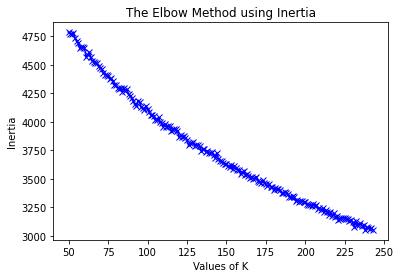

In [ ]:
plt.plot(K, list(inertias.values()), 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

#2.2 - DBSCAN Clustering

In [ ]:
dbscanModel = DBSCAN(eps=1.5, min_samples=1)

In [ ]:
dbscanModel.fit(dataset)

DBSCAN(eps=1.5, min_samples=1)

In [ ]:
labels = dbscanModel.labels_
estimatedClass = set(labels)
len(estimatedClass)

315

In [ ]:
predicts = dbscanModel.fit_predict(dataset)

classSampleCount = {}

print("DBSCAN CLUSTERING PREDICTS")

for i, predict in enumerate(predicts):
  if predict not in classSampleCount.keys():
    classSampleCount[predict] = 1
  else:
    classSampleCount[predict] += 1

  if i%50 == 0:
    print()
  print(predict, end=", ")
print()
classSampleCount

DBSCAN CLUSTERING PREDICTS

0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 
0, 0, 5, 0, 0, 6, 0, 0, 7, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 9, 9, 0, 0, 0, 0, 10, 0, 0, 0, 11, 12, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 13, 
14, 0, 15, 0, 0, 0, 9, 0, 0, 0, 0, 0, 16, 0, 0, 0, 17, 18, 0, 0, 0, 0, 19, 0, 20, 21, 0, 0, 0, 22, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
0, 0, 0, 0, 0, 0, 0, 23, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 24, 0, 0, 0, 0, 25, 0, 0, 0, 0, 26, 27, 0, 28, 0, 0, 0, 29, 29, 0, 0, 0, 30, 31, 0, 
0, 0, 0, 0, 30, 0, 32, 0, 0, 0, 33, 0, 0, 0, 30, 34, 0, 0, 0, 35, 0, 0, 0, 0, 0, 0, 0, 0, 0, 36, 0, 37, 38, 38, 0, 0, 31, 0, 39, 0, 31, 0, 0, 40, 41, 0, 0, 0, 0, 0, 
0, 0, 0, 0, 42, 43, 44, 0, 45, 0, 0, 0, 46, 47, 0, 47, 0, 0, 0, 0, 0, 48, 49, 0, 0, 0, 0, 0, 50, 0, 51, 52, 0, 53, 0, 53, 0, 0, 0, 51, 51, 0, 0, 0, 0, 0, 0, 54, 55, 56, 
0, 0, 0, 

{0: 1700,
 1: 2,
 2: 1,
 3: 1,
 4: 1,
 5: 1,
 6: 1,
 7: 1,
 8: 1,
 9: 3,
 10: 1,
 11: 1,
 12: 1,
 13: 1,
 14: 1,
 15: 1,
 16: 2,
 17: 1,
 18: 3,
 19: 1,
 20: 1,
 21: 2,
 22: 1,
 23: 1,
 24: 2,
 25: 1,
 26: 1,
 27: 4,
 28: 4,
 29: 2,
 30: 4,
 31: 3,
 32: 1,
 33: 1,
 34: 2,
 35: 1,
 36: 1,
 37: 1,
 38: 2,
 39: 2,
 40: 1,
 41: 1,
 42: 1,
 43: 1,
 44: 1,
 45: 2,
 46: 1,
 47: 2,
 48: 1,
 49: 1,
 50: 1,
 51: 5,
 52: 1,
 53: 2,
 54: 1,
 55: 1,
 56: 1,
 57: 1,
 58: 1,
 59: 3,
 60: 2,
 61: 1,
 62: 1,
 63: 1,
 64: 1,
 65: 1,
 66: 4,
 67: 3,
 68: 4,
 69: 2,
 70: 1,
 71: 5,
 72: 1,
 73: 1,
 74: 2,
 75: 1,
 76: 1,
 77: 1,
 78: 1,
 79: 1,
 80: 2,
 81: 1,
 82: 3,
 83: 1,
 84: 1,
 85: 1,
 86: 1,
 87: 1,
 88: 2,
 89: 1,
 90: 1,
 91: 1,
 92: 1,
 93: 2,
 94: 2,
 95: 1,
 96: 4,
 97: 1,
 98: 1,
 99: 1,
 100: 1,
 101: 1,
 102: 1,
 103: 1,
 104: 1,
 105: 1,
 106: 1,
 107: 3,
 108: 1,
 109: 1,
 110: 1,
 111: 1,
 112: 1,
 113: 1,
 114: 2,
 115: 2,
 116: 1,
 117: 1,
 118: 3,
 119: 1,
 120: 1,
 121: 4,
 122: 5,


#2.3 - Agglomerative Clustering

In [ ]:
agglomerativeModel = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

In [ ]:
agglomerativeModel = agglomerativeModel.fit(dataset)

In [ ]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

    return linkage_matrix

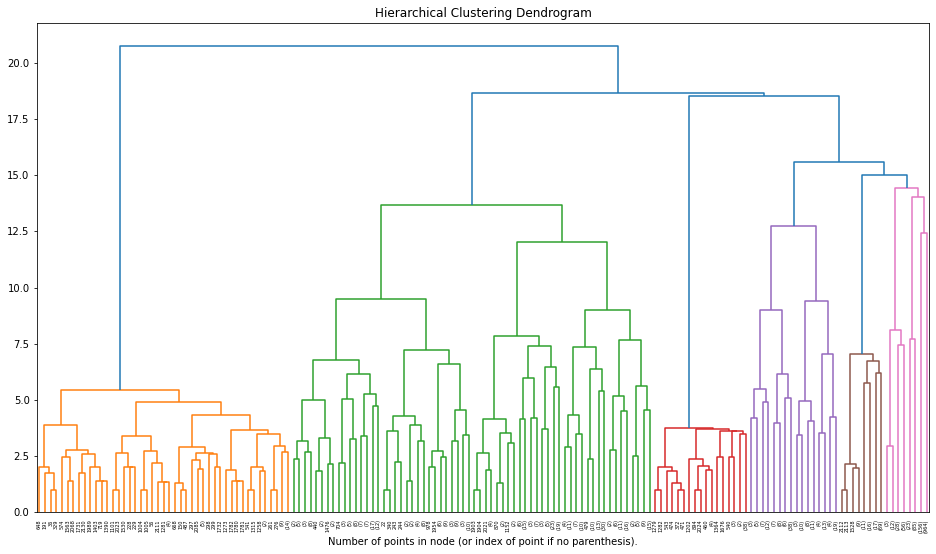

In [ ]:
f = plt.figure()
f.set_figwidth(16)
f.set_figheight(9)
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
linkage_matrix = plot_dendrogram(agglomerativeModel, truncate_mode="level", p=7)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

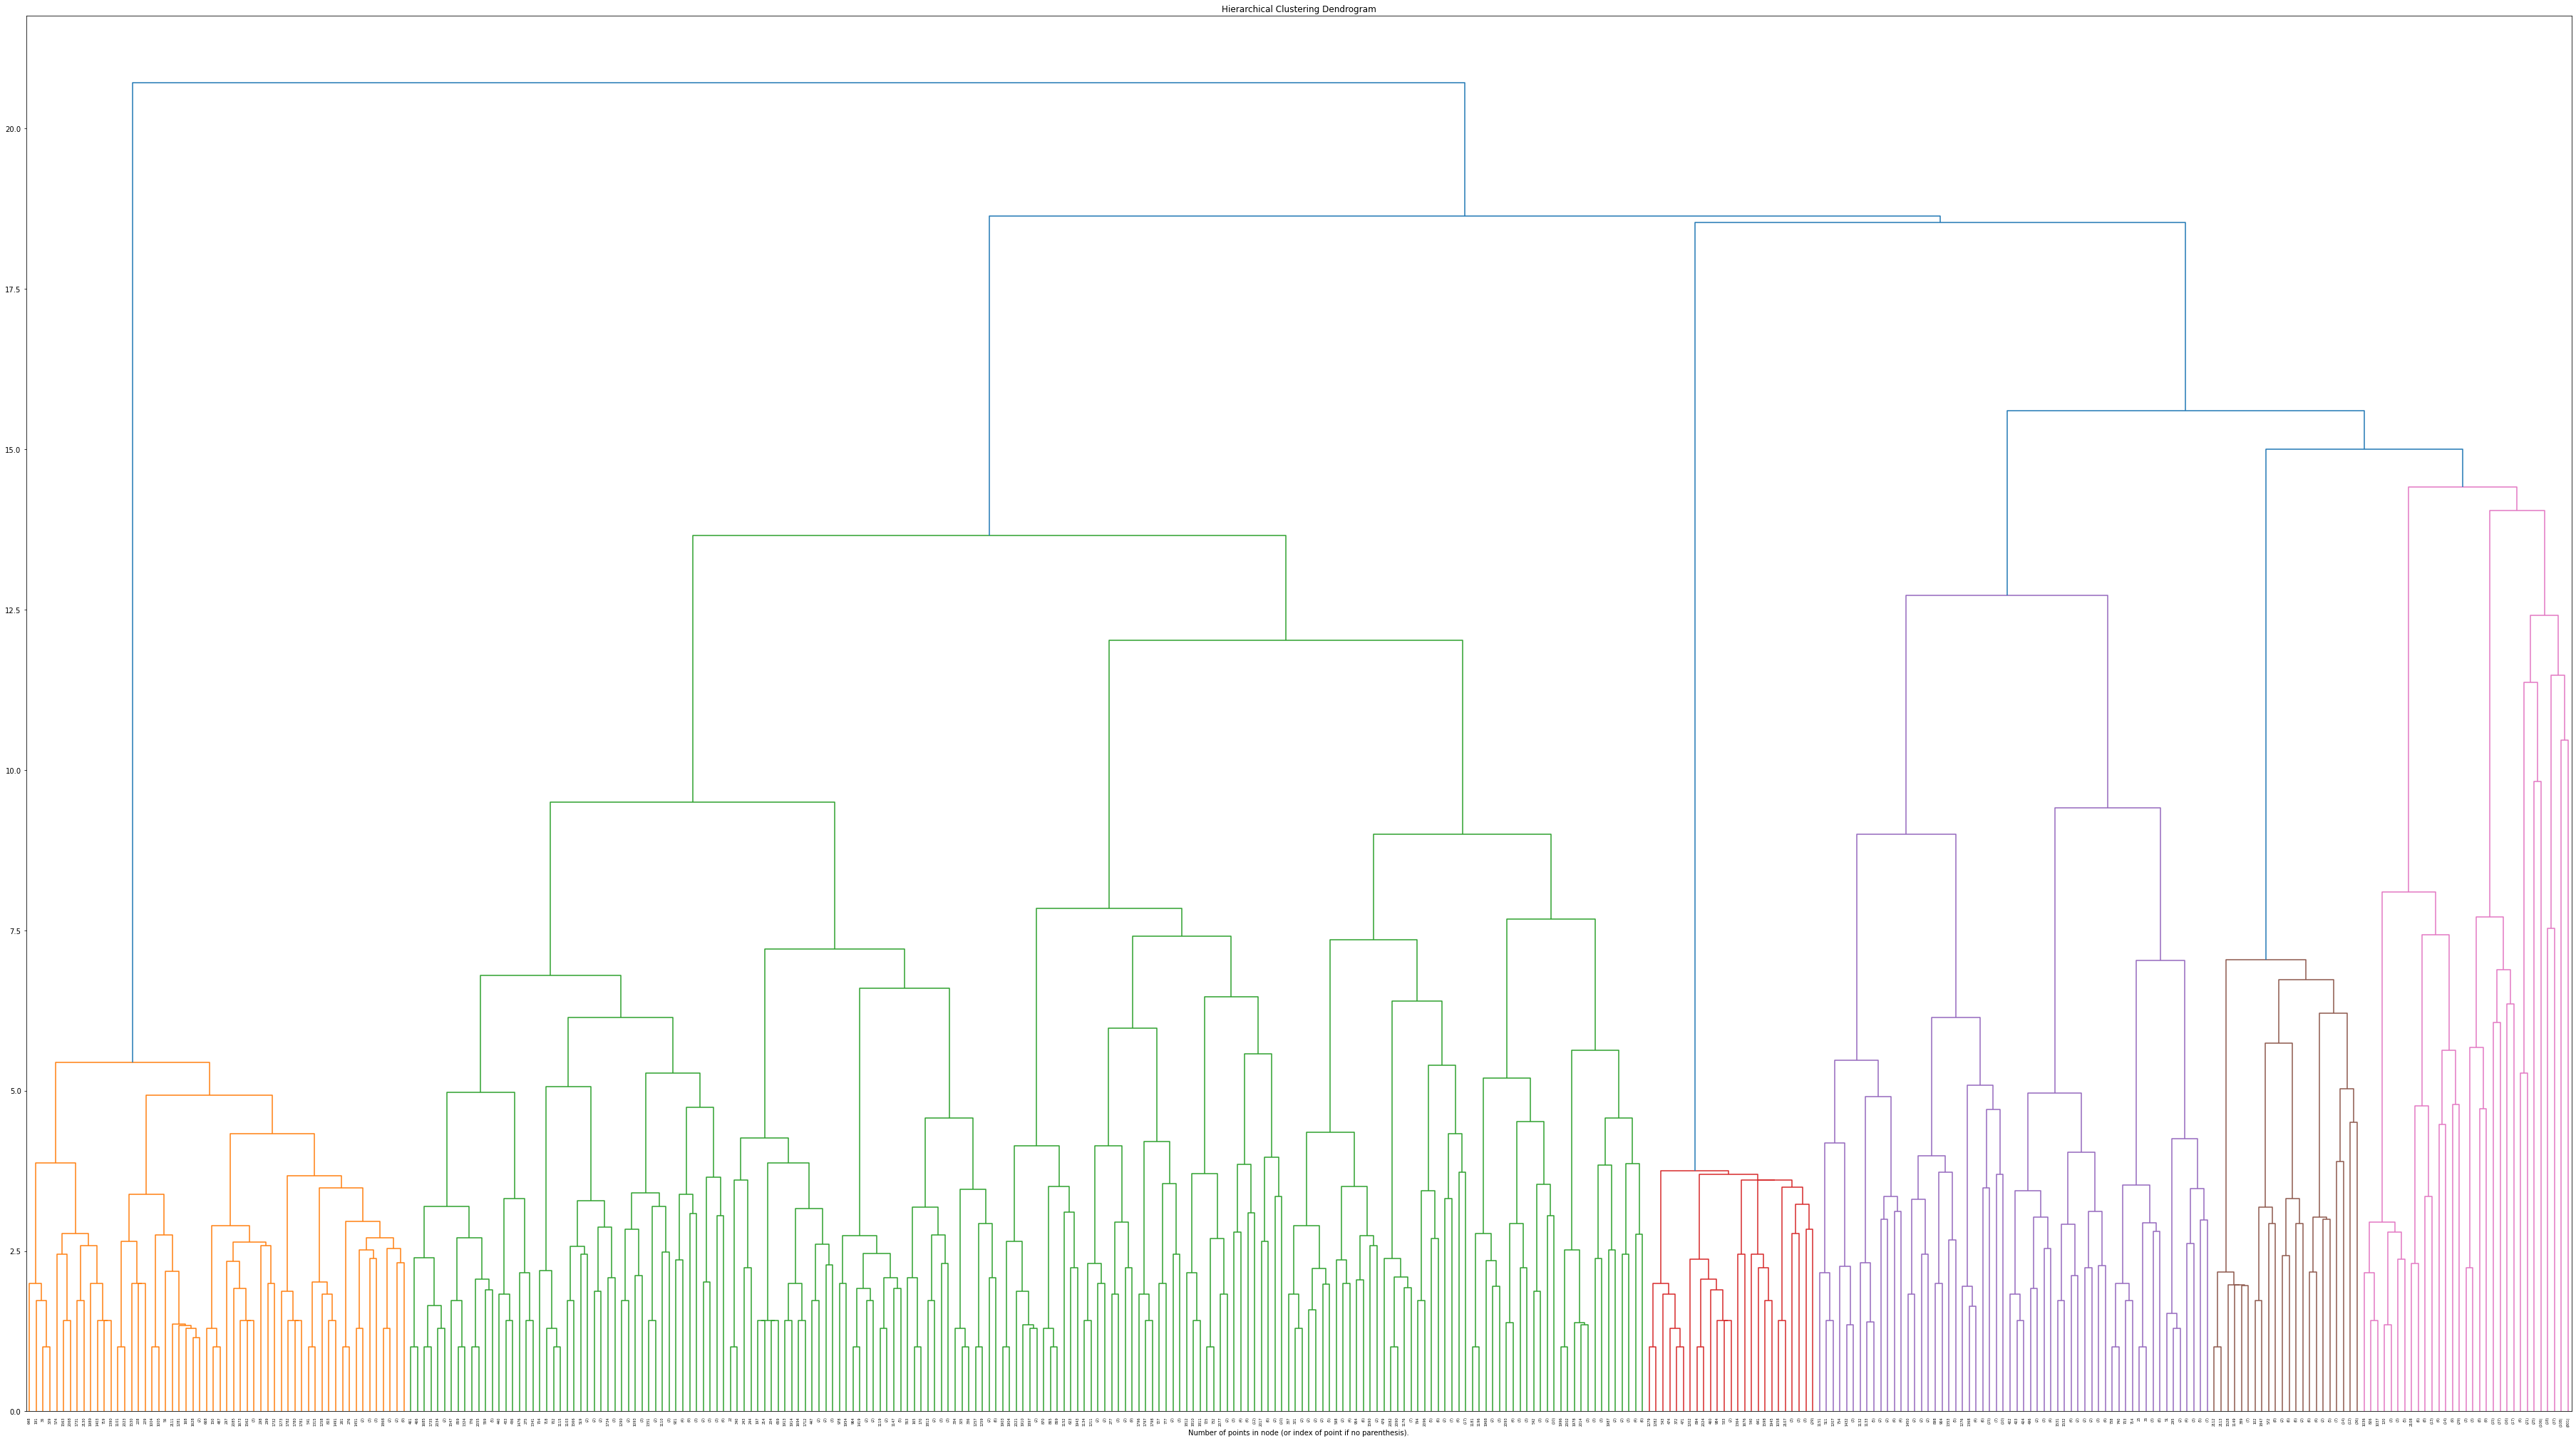

In [ ]:
f = plt.figure()
f.set_figwidth(64)
f.set_figheight(36)
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
linkage_matrix = plot_dendrogram(agglomerativeModel, truncate_mode="level", p=9)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [ ]:
agglomerativeModel = AgglomerativeClustering(n_clusters=256)
aggModel_Predict = agglomerativeModel.fit_predict(dataset)
aggModel_Predict

array([ 73, 165,  13, ..., 135,  87,  53])

In [ ]:
kanji_clustered = []
for i in range(111):
  indexs = np.argwhere(linkage_matrix[:,3] == i)

  kanji_clustered.append([])

  for x in indexs:
    kanji_clustered[i].append(kanji_list[int(x)])

In [ ]:
print(len(kanji_clustered))
i = 0
for line in kanji_clustered:
  print(line)
  for x in line:
    i+=1
print(i)

111
[]
[]
['亜', '哀', '挨', '愛', '曖', '握', '圧', '扱', '宛', '案', '暗', '以', '衣', '位', '医', '依', '委', '威', '為', '畏', '胃', '尉', '異', '萎', '偉', '椅', '彙', '意', '違', '維', '慰', '遺', '緯', '域', '育', '一', '壱', '逸', '茨', '芋', '引', '印', '因', '咽', '姻', '員', '院', '淫', '陰', '飲', '隠', '韻', '右', '宇', '羽', '雨', '唄', '鬱', '畝', '浦', '運', '雲', '永', '泳', '英', '映', '栄', '営', '詠', '影', '鋭', '衛', '易', '疫', '益', '液', '駅', '悦', '越', '謁', '閲', '円', '延', '沿', '炎', '怨', '宴', '媛', '援', '園', '煙', '猿', '遠', '鉛', '塩', '演', '縁', '艶', '汚', '王', '凹', '央', '応', '往', '押', '旺', '欧', '殴', '桜', '翁', '奥', '横', '岡', '屋', '億', '憶', '臆', '虞', '乙', '俺', '卸', '音', '恩', '温', '穏', '下', '化', '火', '加', '可', '仮', '何', '花', '佳', '価', '果', '河', '苛', '科', '架', '夏', '家', '荷', '華', '菓', '貨', '渦', '過', '嫁', '暇', '禍', '靴', '寡', '歌', '箇', '稼', '課', '蚊', '牙', '瓦', '我', '画', '芽', '賀', '雅', '餓', '介', '回', '灰', '会', '快', '戒', '改', '怪', '拐', '悔', '海', '界', '皆', '械', '絵', '開', '階', '塊', '楷', '解', '潰', '壊', '懐', '諧', '貝', '外', '劾', '害', '崖', '涯', '街', '慨',

In [ ]:
print(len(set(linkage_matrix[:,3])))
print(len(linkage_matrix[:,3]))
for x in linkage_matrix[:,3]:
  print(x)

111
2135
2.0
2.0
2.0
2.0
2.0
3.0
2.0
2.0
2.0
2.0
3.0
4.0
2.0
2.0
2.0
2.0
2.0
3.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
3.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0

In [ ]:
linkage_matrix[0:20]

array([[2.600e+02, 1.380e+03, 0.000e+00, 2.000e+00],
       [4.550e+02, 1.375e+03, 0.000e+00, 2.000e+00],
       [1.300e+01, 1.260e+02, 0.000e+00, 2.000e+00],
       [1.720e+02, 5.860e+02, 0.000e+00, 2.000e+00],
       [1.060e+03, 1.875e+03, 0.000e+00, 2.000e+00],
       [2.075e+03, 2.140e+03, 0.000e+00, 3.000e+00],
       [1.137e+03, 1.284e+03, 0.000e+00, 2.000e+00],
       [2.920e+02, 4.420e+02, 0.000e+00, 2.000e+00],
       [8.290e+02, 1.478e+03, 0.000e+00, 2.000e+00],
       [1.391e+03, 2.059e+03, 0.000e+00, 2.000e+00],
       [1.634e+03, 2.144e+03, 0.000e+00, 3.000e+00],
       [1.873e+03, 2.146e+03, 0.000e+00, 4.000e+00],
       [1.340e+02, 7.650e+02, 0.000e+00, 2.000e+00],
       [9.000e+02, 1.427e+03, 0.000e+00, 2.000e+00],
       [8.900e+01, 1.320e+02, 0.000e+00, 2.000e+00],
       [5.940e+02, 1.041e+03, 0.000e+00, 2.000e+00],
       [1.503e+03, 1.519e+03, 0.000e+00, 2.000e+00],
       [1.962e+03, 2.151e+03, 0.000e+00, 3.000e+00],
       [1.082e+03, 1.905e+03, 0.000e+00, 2.000